# Erasmus Neural Networks
http://michalbereta.pl/nn
## RBF Networks (Radial basis function networks)


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### RBF network - class design

https://en.wikipedia.org/wiki/Radial_basis_function_network

```
An input vector x is used as input to all radial basis functions, each with different parameters. The output of the network is a linear combination of the outputs from radial basis functions.
```

In order to calculate the response of `ith` hidden neuron for a given input `x`, in the following code we use the radial function as:

$$ houput[i](x) = e^{-\frac{||x-hcenters[i]||^2}{hsigmas[i]^2}}$$

In [1]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        pass
    def Print(self):#print basic info about the network
        pass
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse for the output layer
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model for the output layer
        pass
###############################################################################        

net = RBFNN(3, 4, 2)


### RBF network - constructor

- Weights of the linear output layer are randomly generated (as usual)

- Parameters of radial hidden units are practically uninitialized here, we leave it for later.

In [2]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
############################################################################### 
        
net = RBFNN(3, 4, 2)
net.Print()


hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.16268942 0.30735464]
 [0.95307271 0.29442311]
 [0.63041361 0.48798793]
 [0.58170956 0.89611295]]
outbiases:
 [0.67607576 0.61135653]


### RBF network - forward pass, calculating the network responses

First, the responses of radial hidden neurons are calculated. Then, based on them, the network's outputs are calculated as the outputs of linear Widorw-Hoff neurons.

In [3]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.72585691 0.9160738 ]
 [0.83812688 0.95755416]
 [0.56698914 0.74082712]
 [0.33254171 0.3299756 ]]
outbiases:
 [0.91038929 0.01770245]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.72585691 0.9160738 ]
 [0.83812688 0.95755416]
 [0.56698914 0.74082712]
 [0.33254171 0.3299756 ]]
outbiases:
 [0.91038929 0.01770245]
houtputs:
 [[0.98007503 0.98007503 0.98007503 0.98007503]
 [0.69601044 0.69601044 0.69601044 0.69601044]
 [0.67948978 0.67948978 0.67948978 0.67948978]
 [0.89489535 0.89489535 0.89489535 0.89489535]
 [0.15497037 0.15497037 0.15497037 0.15497037]]
netoutputs:
 [[3.32481846 2.90346544]
 [2.62502119 2.06705694]
 [2.5843223  2.018413  ]
 [3.11497708 2.65265978]
 [1.29216107 0.47400197]]


### RBF network - getting network responses, calculating classification errors and MSE (mean squared error)

In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.590305   0.8897259 ]
 [0.07065969 0.76473977]
 [0.21071164 0.60119689]
 [0.41686688 0.54064629]]
outbiases:
 [0.64490653 0.59688527]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.590305   0.8897259 ]
 [0.07065969 0.76473977]
 [0.21071164 0.60119689]
 [0.41686688 0.54064629]]
outbiases:
 [0.64490653 0.59688527]
houtputs:
 [[0.28747488 0.28747488 0.28747488 0.28747488]
 [0.40436746 0.40436746 0.40436746 0.40436746]
 [0.13839011 0.13839011 0.13839011 0.13839011]
 [0.3907922  0.3907922  0.3907922  0.3907922 ]
 [0.81724984 0.81724984 0.81724984 0.81724984]]
netoutputs:
 [[1.01533032 1.40075381]
 [1.16595147 1.72762158]
 [0.82322816 0.98386676]
 [1.14845916 1.68966096]
 [1.69796825 2.88216822]]


### RBF network - initializing the centres of radial functions based on training data

Radial neurons have to be properly placed in the input space. The idea here is as follows: 

- select randomly a given number of training examples without repetitions, the number equals the number of hidden neurons;

- use the positions of selected training examples as the centers of radial neurons;

- sigma values will be adjusted by trial and error.

<IPython.core.display.Javascript object>


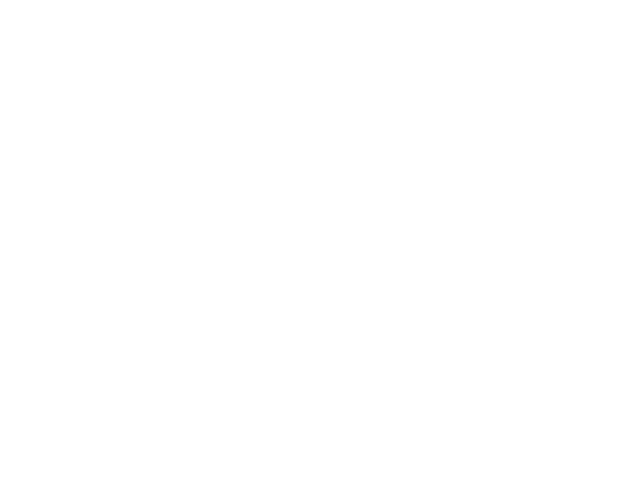

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

<IPython.core.display.Javascript object>


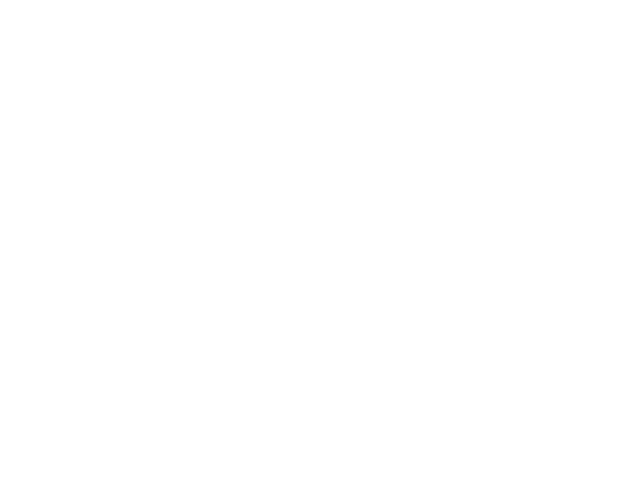

In [5]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 100 #experiment with this value, original:5
sigma = 0.1 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Forward(X)
net.Print()

#no training
net.InitCenters(X, sigma)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.show()


### RBF network - train the output layer's weights using matrix pseudo-inverse

Experiment with different numbers of hidden radial neurons and sigma values.

<IPython.core.display.Javascript object>


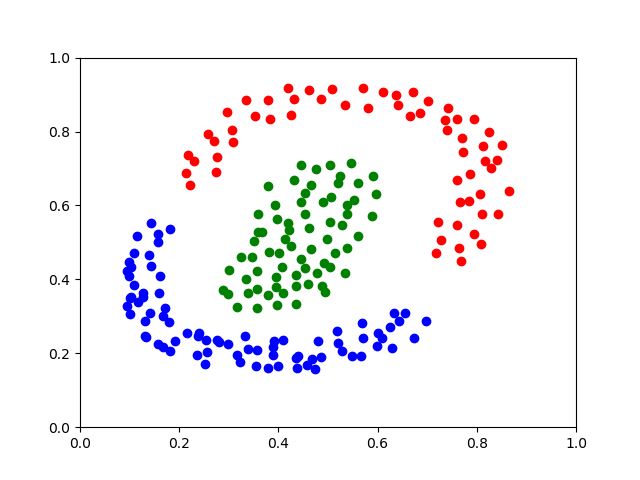

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

MSE after training= 922.1767633464792
Classification error after training= 144
houts max= 0.9311928420012003
out w max= 0.9988912717995407
out w min= 0.000979408272948512


<IPython.core.display.Javascript object>


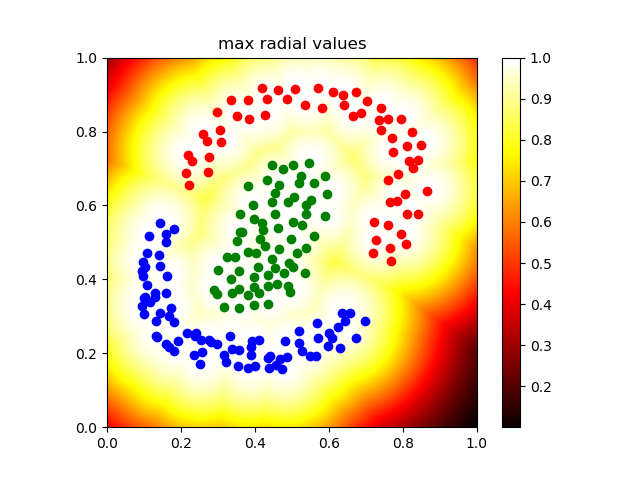

<IPython.core.display.Javascript object>


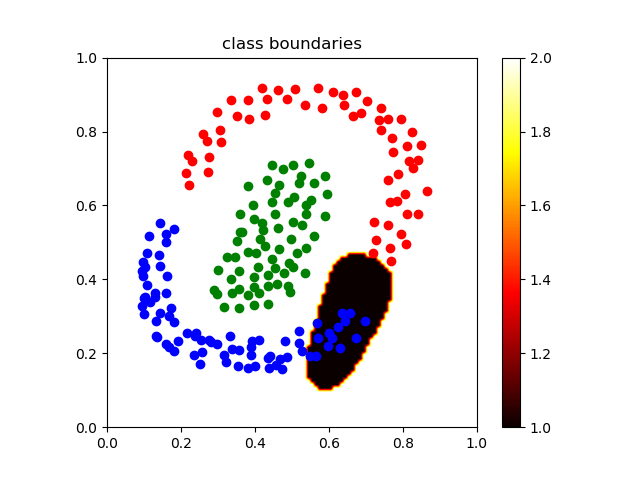

In [6]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

net = RBFNN(num_of_ins, 100, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))


sigma = 0.3
net.TrainMPInv(X, dtrain, sigma)

net.Forward(X)
#net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()



### RBF network - train the output layer's weights using iterative algorithm (Widrow-Hoff, delta rule)

Note the division in:

```
self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
```

The devision is done to avoid too strong gradients, when the number of training examples is huge.



<IPython.core.display.Javascript object>


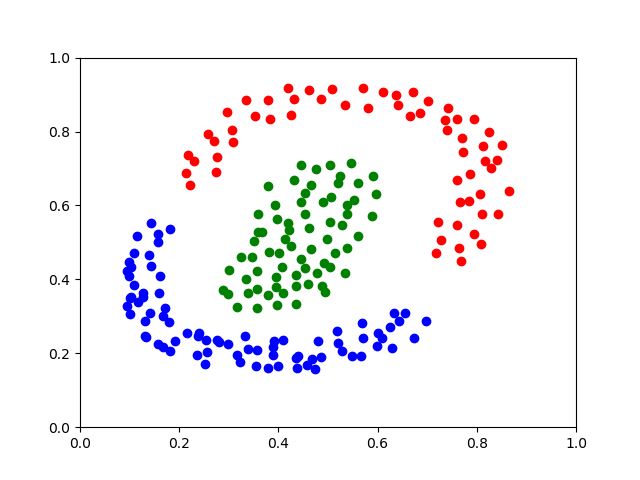

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
outweights:
 [[0.75534652 0.49815672 0.21856663]
 [0.11962456 0.0940694  0.14953085]
 [0.16855627 0.19364089 0.62008103]
 [0.30682189 0.09787587 0.83936501]
 [0.36815059 0.86686055 0.93737844]
 [0.74839218 0.51638287 0.14075438]
 [0.96037487 0.91682454 0.78986037]
 [0.24998538 0.06741441 0.56783409]
 [0.26324228 0.79987087 0.85076897]
 [0.2793419  0.99885007 0.75745185]
 [0.50738259 0.36985643 0.25787982]
 [0.79633967 0.61943719 0.82217343]
 [0.63719208 0.98204279 0.40847721]
 [0.5573831  0.54185586 0.78368494]
 [0.06408689 0.01513329 0.26079298]
 [0.04947562 0.86154543 0.98648619]
 [0.53841292 0.13772922 0.25173513]
 [0.52531712 0.4653544

mse= 0.4024304056545204
classification_error= 3

mse= 0.39661900919246834
classification_error= 3

mse= 0.3911792744940465
classification_error= 3

mse= 0.3860670906338551
classification_error= 3

mse= 0.38124570465778507
classification_error= 3

mse= 0.3766842761189774
classification_error= 3

mse= 0.3723567420322267
classification_error= 2

mse= 0.368240921271622
classification_error= 2

mse= 0.3643178045782225
classification_error= 2

mse= 0.3605709891173242
classification_error= 2

mse= 0.3569862261040456
classification_error= 2

mse= 0.35355105724379077
classification_error= 2

mse= 0.3502545212186815
classification_error= 2

mse= 0.3470869156345492
classification_error= 1

mse= 0.34403960304957504
classification_error= 1

mse= 0.34110485217427233
classification_error= 1

mse= 0.3382757072408202
classification_error= 1

mse= 0.3355458800205539
classification_error= 1

mse= 0.33290966012153933
classification_error= 1

mse= 0.33036184009908465
classification_error= 1

mse= 0.3278976

mse= 0.21418501451298683
classification_error= 0

mse= 0.21390412842656492
classification_error= 0

hcenters:
 [[0.528 0.206]
 [0.57  0.24 ]
 [0.644 0.288]
 [0.812 0.76 ]
 [0.742 0.864]
 [0.438 0.16 ]
 [0.334 0.886]
 [0.276 0.236]
 [0.486 0.888]
 [0.638 0.898]
 [0.816 0.72 ]
 [0.132 0.288]
 [0.128 0.352]
 [0.098 0.41 ]
 [0.102 0.434]
 [0.18  0.284]
 [0.158 0.5  ]
 [0.35  0.504]
 [0.098 0.446]
 [0.094 0.422]
 [0.596 0.63 ]
 [0.1   0.306]
 [0.316 0.326]
 [0.46  0.388]
 [0.446 0.456]]
hsigmas:
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
outweights:
 [[-0.28622353  0.13978686  0.63143421]
 [-0.75114178 -0.16811268  0.45712345]
 [-0.00826438 -0.05359347  1.03299958]
 [ 0.27754871 -0.25595567  0.18919871]
 [ 0.04859929  0.16819011  0.14170319]
 [-0.30939085 -0.06108347  1.11888442]
 [ 1.13516721  0.20314158  0.02151707]
 [-0.3882634  -0.37302097  1.02346545]
 [-0.11248211  0.1264197  -0.06579821]
 [ 0.27839336  0.05055245 -0.1227107

<IPython.core.display.Javascript object>


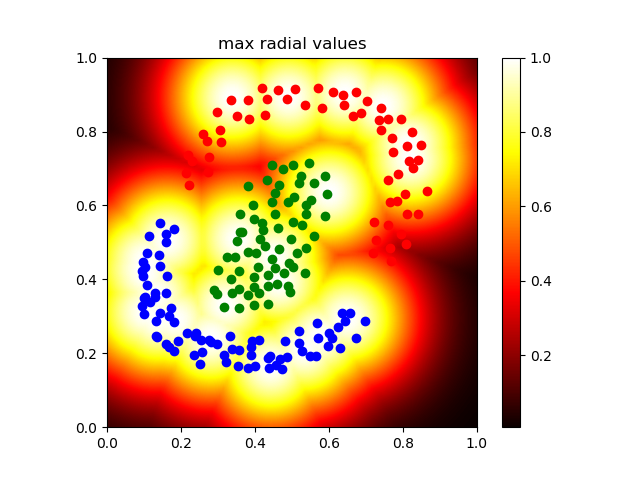

<IPython.core.display.Javascript object>


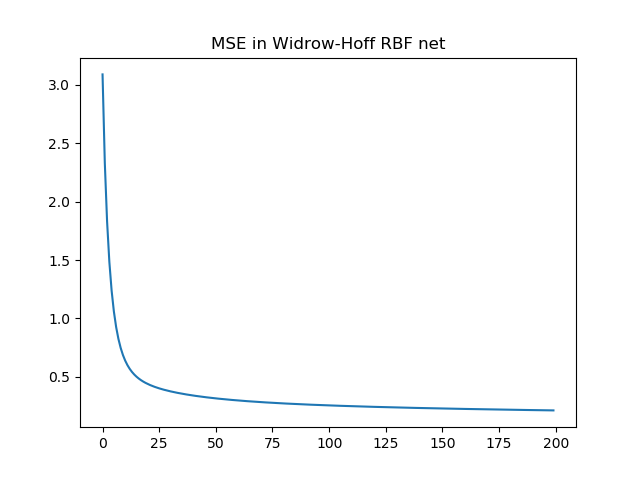

<IPython.core.display.Javascript object>


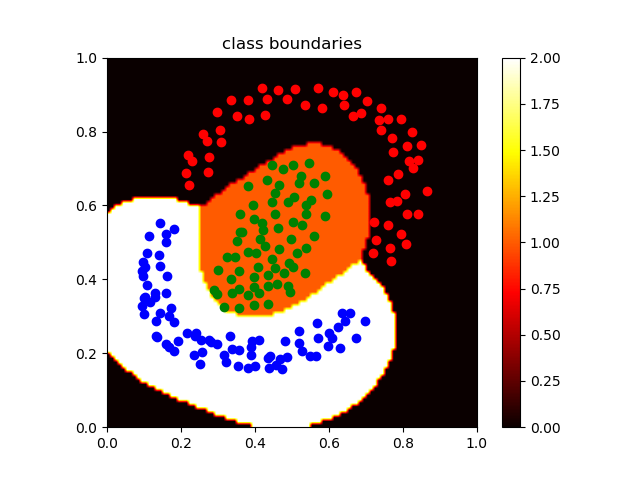

In [7]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model, delta rule
        self.InitCenters(X, sigma)
        self.Forward(X)
        self.stats = []
        for i in range(max_iters):
            self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
            self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
            self.Forward(X)
            mse = self.GetMSE(d)
            self.stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()            
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 25 #experiment with this value, original : 100, 50
sigma = 0.2 #experiment with this value, original : 0.1, 0.08

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.5, 200) 
#epoch : 200, 100
#lr : 0.05, 0.5


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
if net.stats != None:
    plt.figure()
    plt.title('MSE in Widrow-Hoff RBF net')
    plt.plot(net.stats)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()


### Task 1

- Use the previous example code.

- Experiment with different settings: number of hidden neurons, number of epoch, eta and sigma values. 

- What is the minimum number of hidden units you can find, so that the learning is still possible? What are the settings?

- Write your answers and comments below.

### YOUR ANSWERS GO IN THIS CELL

I managed to get the correct classification by using only 25 hidden
units, a standard deviation of 0.2, a learning rate of 0.5 and 200 epochs.

### Task 2

- Use the RBF network for iris dataset.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Remeber about normalizing the inputs

### YOUR ANSWERS AND COMMENTS HERE

Without normalizing the inputs after 200 epochs I got 23 errors with a learning rate of 0.1 and 0 errors with a learning rate of 0.5. With normalization I got only 3 errors after 200 epochs with a learning rate of 0.1.
I'm using 150 hidden units and a standard deviation of 0.2.

The matrix psudo-inverse doesn't seem to work for this data, because after training it gets still 91 errors (see below).



In [8]:
# Normalization of data

def normalize_divide_max(data):
    maxs = np.amax(np.abs(data), axis=0)
    return data / maxs

In [9]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import pandas as pd

data = pd.read_csv("iris.csv", delimiter="\t", header=None).as_matrix()
X = np.array(data[:,:4]).astype("float")
d = np.array(data[:,4])

X=normalize_divide_max(X)

print(X)

dict={"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

d[d == "Iris-setosa"] = dict['Iris-setosa']
d[d == "Iris-versicolor"] = dict['Iris-versicolor']
d[d == "Iris-virginica"] = dict['Iris-virginica']

print(d)

num_of_cls = 3 #number of classes
num_of_ins = len(X[0]) #number of inputs

print("size=", num_of_cls, num_of_ins)

dtrain = encode_labels_as_binary(d.astype(int), num_of_cls) 

print(dtrain)

[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]
 [0.6835443  0.88636364 0.24637681 0.16      ]
 [0.58227848 0.77272727 0.20289855 0.12      ]
 [0.63291139 0.77272727 0.2173913  0.08      ]
 [0.55696203 0.65909091 0.20289855 0.08      ]
 [0.62025316 0.70454545 0.2173913  0.04      ]
 [0.6835443  0.84090909 0.2173913  0.08      ]
 [0.60759494 0.77272727 0.23188406 0.08      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]
 [0.5443038  0.68181818 0.15942029 0.04      ]
 [0.73417722 0.90909091 0.17391304 0.08      ]
 [0.72151899 1.         0.2173913  0.16      ]
 [0.6835443  0.88636364 0.1884058  0.16      ]
 [0.64556962 0.79545455 0.20289855 0.12      ]
 [0.72151899 0.86363636 0.24637681 0.12      ]
 [0.64556962 0.86363636 0.2173913  0.12      ]
 [0.6835443  0.77272727 0.24637681 0.08      ]
 [0.64556962 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
#num_of_cls = len(set(d))
#num_of_ins = X.shape[1]

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 150 #experiment with this value, original : 100, 50, 25
sigma = 0.2 #experiment with this value, original : 0.1, 0.08, 0.2

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.1, 200) 
#epoch : 200, 100
#lr : 0.05, 0.5


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())




hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]

mse= 0.5587671763670005
classification_error= 6

mse= 0.5476082256127904
classification_error= 6

mse= 0.537582157106257
classification_error= 6

mse= 0.5285289443556664
classification_error= 6

mse= 0.5203129128657289
classification_error= 6

mse= 0.5128189127950012
classification_error= 6

mse= 0.5059491173340773
classification_error= 6

mse= 0.4996203358589241
classification_error= 6

mse= 0.49376175404190803
classification_error= 6

mse= 0.4883130300972101
classification_error= 6

mse= 0.4832226892512516
classification_error= 6

mse= 0.4784467686192333
classification_error= 6

mse= 0.47394767272714167
classification_error= 6

mse= 0.4696932064601348
classification_error= 5

mse= 0.46565575759194205
classification_error= 5

mse= 0.4618116055016713
classification_error= 5

mse= 0.4581403363940293
classification_error= 5

mse= 0.4546243484427098
classification_error= 5

mse= 0.45124843288071437
classification_error= 5

mse= 0.4479994192502514
classification_error= 5

mse= 0.4448658748

In [11]:
hidden_num = 150 #experiment with this value, original : 100, 50, 25
sigma = 0.2 #experiment with this value, original : 0.1, 0.08, 0.2

net2 = RBFNN(num_of_ins, hidden_num, num_of_cls)
net2.Print()
net2.Forward(X)
net2.Print()
print('MSE before training=',net2.GetMSE(dtrain))
print('Classification error before training=',net2.GetClassificationError(d)) 

net2.TrainMPInv(X, dtrain, sigma)
net2.Forward(X)
net2.Print()
print('MSE after training=',net2.GetMSE(dtrain))
print('Classification error after training=',net2.GetClassificationError(d))


hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]

 [0. 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
outweights:
 [[0.11458739 0.22022525 0.93003541]
 [0.40891225 0.3166114  0.48418929]
 [0.32360736 0.5772649  0.33580269]
 [0.56631453 0.22742274 0.89462966]
 [0.96270171 0.95599519 0.81166469]
 [0.55569974 0.91693094 0.4708769 ]
 [0.86344146 0.97318867 0.81635721]
 [0.25208759 0.74548356 0.37159122]
 [0.77668014 0.9654958  0.62903234]
 [0.21119202 0.21315374 0.17818699]
 [0.02506451 0.20536242 0.27688261]
 [0.57392485 0.03050889 0.598471  ]
 [0.94237039 0.60267004 0.16327619]
 [0.78825965 0.39532617 0.44348288]

hcenters:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]
 [0.6835443  0.88636364 0.24637681 0.16      ]
 [0.58227848 0.77272727 0.20289855 0.12      ]
 [0.63291139 0.77272727 0.2173913  0.08      ]
 [0.55696203 0.65909091 0.20289855 0.08      ]
 [0.62025316 0.70454545 0.2173913  0.04      ]
 [0.6835443  0.84090909 0.2173913  0.08      ]
 [0.60759494 0.77272727 0.23188406 0.08      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]
 [0.5443038  0.68181818 0.15942029 0.04      ]
 [0.73417722 0.90909091 0.17391304 0.08      ]
 [0.72151899 1.         0.2173913  0.16      ]
 [0.6835443  0.88636364 0.1884058  0.16      ]
 [0.64556962 0.79545455 0.20289855 0.12      ]
 [0.72151899 0.86363636 0.24637681 0.12      ]
 [0.64556962 0.86363636 0.2173913  0.12      ]
 [0.6835443  0.77272727 0.24637681 0.08      ]
 [

### Task 3

- Use the RBF network for pima-diabetes dataset. There are two classes, the last column indicates the class.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Use also MCPerceptron class (or your implementation of Widrow-Hoff model) as a linear model. Compare the results.

### YOUR ANSWERS AND COMMENTS HERE

With normalization of data, I managed to get 20 errors with a learning rate of 0.7, 700 hidden units, 4900 epochs and a standard deviation of 0.06.
The matrix psudo-inverse doesn't seem to work for this data, because after training it gets still 314 errors (see below).

In [12]:

    
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import pandas as pd

data = pd.read_csv("pima-diabetes.csv", delimiter=",", header=None).as_matrix()
X = np.array(data[:,:len(data[0])-1]).astype("float")
d = np.array(data[:,len(data[0])-1])

X=normalize_divide_max(X) 

print("set=", set(d))

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print("size=", num_of_cls, num_of_ins)

dtrain = encode_labels_as_binary(d.astype(int), num_of_cls) 

print(dtrain)

hidden_num = 700 #experiment with this value, original : 100, 50, 25
sigma = 0.06 #experiment with this value, original : 0.1, 0.08, 0.2

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.7, 4900) 
#epoch : 200, 100, 500
#lr : 0.05, 0.5, 0.9


net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


set= {0.0, 1.0}
size= 2 8
[[-1.  1.]
 [ 1. -1.]
 [-1.  1.]
 ...
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]]
hcenters:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


mse= 2.1076624690481975
classification_error= 286

mse= 2.0164323690255777
classification_error= 281

mse= 2.0051274796596936
classification_error= 278

mse= 2.0009774150581
classification_error= 278

mse= 1.997473387068611
classification_error= 278

mse= 1.9940332201959663
classification_error= 276

mse= 1.9906048308886664
classification_error= 275

mse= 1.9871835484470532
classification_error= 275

mse= 1.9837689429281002
classification_error= 273

mse= 1.9803609637189208
classification_error= 273

mse= 1.9769595941605125
classification_error= 273

mse= 1.9735648206563308
classification_error= 273

mse= 1.9701766299092238
classification_error= 273

mse= 1.9667950086742367
classification_error= 273

mse= 1.9634199437364508
classification_error= 273

mse= 1.960051421908938
classification_error= 273

mse= 1.956689430032527
classification_error= 272

mse= 1.9533339549757247
classification_error= 272

mse= 1.9499849836346517
classification_error= 271

mse= 1.9466425029329824
classificatio

mse= 1.5294576123582624
classification_error= 209

mse= 1.5269261962330531
classification_error= 208

mse= 1.5243996371051036
classification_error= 208

mse= 1.5218779253328059
classification_error= 207

mse= 1.5193610512944897
classification_error= 207

mse= 1.5168490053883783
classification_error= 207

mse= 1.5143417780325452
classification_error= 206

mse= 1.5118393596648698
classification_error= 205

mse= 1.509341740742997
classification_error= 205

mse= 1.5068489117442911
classification_error= 205

mse= 1.504360863165795
classification_error= 205

mse= 1.501877585524187
classification_error= 205

mse= 1.4993990693557384
classification_error= 203

mse= 1.496925305216269
classification_error= 202

mse= 1.4944562836811073
classification_error= 202

mse= 1.4919919953450462
classification_error= 202

mse= 1.489532430822302
classification_error= 202

mse= 1.4870775807464707
classification_error= 202

mse= 1.4846274357704878
classification_error= 202

mse= 1.4821819865665848
classificati

mse= 1.1765178324415038
classification_error= 124

mse= 1.1746602629538268
classification_error= 122

mse= 1.172806220914732
classification_error= 122

mse= 1.1709556994100385
classification_error= 121

mse= 1.1691086915396258
classification_error= 120

mse= 1.1672651904174045
classification_error= 120

mse= 1.1654251891712857
classification_error= 120

mse= 1.1635886809431517
classification_error= 120

mse= 1.1617556588888263
classification_error= 117

mse= 1.1599261161780448
classification_error= 116

mse= 1.1581000459944246
classification_error= 115

mse= 1.1562774415354353
classification_error= 114

mse= 1.15445829601237
classification_error= 112

mse= 1.152642602650314
classification_error= 111

mse= 1.150830354688119
classification_error= 111

mse= 1.1490215453783692
classification_error= 108

mse= 1.147216167987356
classification_error= 108

mse= 1.145414215795047
classification_error= 108

mse= 1.143615682095057
classification_error= 108

mse= 1.1418205601946187
classification_

mse= 0.9089828807934571
classification_error= 46

mse= 0.9076309520289326
classification_error= 46

mse= 0.9062815651236678
classification_error= 46

mse= 0.9049347151530661
classification_error= 45

mse= 0.9035903972023925
classification_error= 45

mse= 0.9022486063667533
classification_error= 45

mse= 0.9009093377510741
classification_error= 45

mse= 0.8995725864700814
classification_error= 45

mse= 0.8982383476482806
classification_error= 45

mse= 0.8969066164199356
classification_error= 45

mse= 0.8955773879290497
classification_error= 44

mse= 0.8942506573293443
classification_error= 44

mse= 0.892926419784238
classification_error= 44

mse= 0.891604670466828
classification_error= 43

mse= 0.8902854045598684
classification_error= 43

mse= 0.8889686172557513
classification_error= 43

mse= 0.8876543037564857
classification_error= 43

mse= 0.8863424592736778
classification_error= 43

mse= 0.8850330790285109
classification_error= 41

mse= 0.8837261582517261
classification_error= 41

ms

mse= 0.7169607292615362
classification_error= 20

mse= 0.715968254609293
classification_error= 20

mse= 0.7149776287964075
classification_error= 20

mse= 0.7139888482771508
classification_error= 20

mse= 0.7130019095128001
classification_error= 20

mse= 0.7120168089716241
classification_error= 20

mse= 0.7110335431288677
classification_error= 20

mse= 0.7100521084667387
classification_error= 20

mse= 0.7090725014743932
classification_error= 20

mse= 0.7080947186479213
classification_error= 20

mse= 0.7071187564903326
classification_error= 20

mse= 0.7061446115115428
classification_error= 20

mse= 0.7051722802283585
classification_error= 20

mse= 0.7042017591644644
classification_error= 20

mse= 0.7032330448504073
classification_error= 20

mse= 0.702266133823584
classification_error= 20

mse= 0.7013010226282262
classification_error= 20

mse= 0.7003377078153865
classification_error= 20

mse= 0.6993761859429246
classification_error= 20

mse= 0.6984164535754935
classification_error= 20

ms

mse= 0.5758061821844814
classification_error= 19

mse= 0.575075542273789
classification_error= 19

mse= 0.5743462512322924
classification_error= 19

mse= 0.573618306496478
classification_error= 19

mse= 0.5728917055078374
classification_error= 19

mse= 0.5721664457128571
classification_error= 19

mse= 0.5714425245630084
classification_error= 19

mse= 0.5707199395147377
classification_error= 19

mse= 0.5699986880294556
classification_error= 19

mse= 0.5692787675735282
classification_error= 19

mse= 0.5685601756182658
classification_error= 19

mse= 0.5678429096399137
classification_error= 19

mse= 0.5671269671196418
classification_error= 19

mse= 0.5664123455435351
classification_error= 19

mse= 0.5656990424025836
classification_error= 19

mse= 0.5649870551926718
classification_error= 19

mse= 0.56427638141457
classification_error= 19

mse= 0.5635670185739238
classification_error= 19

mse= 0.5628589641812433
classification_error= 19

mse= 0.5621522157518956
classification_error= 19

mse=

mse= 0.4717561232887912
classification_error= 19

mse= 0.47121676013883285
classification_error= 19

mse= 0.4706783837572126
classification_error= 19

mse= 0.47014099228383516
classification_error= 19

mse= 0.4696045838621996
classification_error= 19

mse= 0.4690691566393908
classification_error= 19

mse= 0.46853470876607384
classification_error= 19

mse= 0.4680012383964855
classification_error= 19

mse= 0.4674687436884281
classification_error= 19

mse= 0.4669372228032618
classification_error= 19

mse= 0.466406673905898
classification_error= 19

mse= 0.4658770951647921
classification_error= 19

mse= 0.4653484847519358
classification_error= 19

mse= 0.46482084084285136
classification_error= 19

mse= 0.4642941616165835
classification_error= 19

mse= 0.4637684452556928
classification_error= 19

mse= 0.4632436899462486
classification_error= 19

mse= 0.46271989387782203
classification_error= 19

mse= 0.46219705524347937
classification_error= 19

mse= 0.46167517223977445
classification_error

mse= 0.39444599060594854
classification_error= 19

mse= 0.39404744295549515
classification_error= 19

mse= 0.39364961757733674
classification_error= 19

mse= 0.3932525131200975
classification_error= 19

mse= 0.39285612823498833
classification_error= 19

mse= 0.39246046157580133
classification_error= 19

mse= 0.392065511798905
classification_error= 19

mse= 0.3916712775632396
classification_error= 19

mse= 0.3912777575303111
classification_error= 19

mse= 0.3908849503641871
classification_error= 19

mse= 0.39049285473149115
classification_error= 19

mse= 0.39010146930139805
classification_error= 19

mse= 0.38971079274562875
classification_error= 19

mse= 0.38932082373844534
classification_error= 19

mse= 0.38893156095664616
classification_error= 19

mse= 0.3885430030795604
classification_error= 19

mse= 0.3881551487890437
classification_error= 19

mse= 0.38776799676947293
classification_error= 19

mse= 0.3873815457077412
classification_error= 19

mse= 0.38699579429325276
classification_

mse= 0.33783334919349567
classification_error= 19

mse= 0.33753691991579887
classification_error= 19

mse= 0.3372410224664751
classification_error= 19

mse= 0.33694565585722774
classification_error= 19

mse= 0.3366508191016366
classification_error= 19

mse= 0.3363565112151535
classification_error= 19

mse= 0.33606273121509966
classification_error= 19

mse= 0.3357694781206611
classification_error= 19

mse= 0.3354767509528858
classification_error= 19

mse= 0.3351845487346794
classification_error= 19

mse= 0.33489287049080224
classification_error= 19

mse= 0.3346017152478649
classification_error= 19

mse= 0.33431108203432575
classification_error= 19

mse= 0.3340209698804863
classification_error= 19

mse= 0.3337313778184881
classification_error= 19

mse= 0.3334423048823094
classification_error= 19

mse= 0.3331537501077608
classification_error= 19

mse= 0.3328657125324826
classification_error= 19

mse= 0.3325781911959406
classification_error= 19

mse= 0.33229118513942285
classification_erro

mse= 0.29500301537233325
classification_error= 19

mse= 0.29478302593138417
classification_error= 19

mse= 0.29456342671042546
classification_error= 19

mse= 0.29434421698902646
classification_error= 19

mse= 0.2941253960481141
classification_error= 19

mse= 0.29390696316997017
classification_error= 19

mse= 0.2936889176382287
classification_error= 19

mse= 0.2934712587378732
classification_error= 19

mse= 0.2932539857552347
classification_error= 19

mse= 0.29303709797798816
classification_error= 19

mse= 0.29282059469515076
classification_error= 19

mse= 0.2926044751970789
classification_error= 19

mse= 0.2923887387754656
classification_error= 19

mse= 0.29217338472333815
classification_error= 19

mse= 0.2919584123350554
classification_error= 19

mse= 0.29174382090630496
classification_error= 19

mse= 0.2915296097341012
classification_error= 19

mse= 0.29131577811678233
classification_error= 19

mse= 0.29110232535400765
classification_error= 19

mse= 0.2908892507467557
classification_

mse= 0.2634928596610386
classification_error= 19

mse= 0.26332843387394406
classification_error= 19

mse= 0.263164296024834
classification_error= 19

mse= 0.2630004455853949
classification_error= 19

mse= 0.26283688202830197
classification_error= 19

mse= 0.2626736048272175
classification_error= 19

mse= 0.262510613456789
classification_error= 19

mse= 0.2623479073926472
classification_error= 19

mse= 0.2621854861114042
classification_error= 19

mse= 0.26202334909065167
classification_error= 19

mse= 0.26186149580895884
classification_error= 19

mse= 0.2616999257458708
classification_error= 19

mse= 0.2615386383819065
classification_error= 19

mse= 0.26137763319855695
classification_error= 19

mse= 0.2612169096782834
classification_error= 19

mse= 0.26105646730451554
classification_error= 19

mse= 0.2608963055616493
classification_error= 19

mse= 0.2607364239350454
classification_error= 19

mse= 0.26057682191102755
classification_error= 19

mse= 0.26041749897688016
classification_error

mse= 0.24014516928737728
classification_error= 19

mse= 0.24002135241202086
classification_error= 19

mse= 0.239897749176449
classification_error= 19

mse= 0.23977435919102796
classification_error= 19

mse= 0.23965118206684924
classification_error= 19

mse= 0.23952821741572783
classification_error= 19

mse= 0.239405464850201
classification_error= 19

mse= 0.23928292398352702
classification_error= 19

mse= 0.23916059442968354
classification_error= 19

mse= 0.23903847580336665
classification_error= 19

mse= 0.23891656771998884
classification_error= 19

mse= 0.23879486979567846
classification_error= 19

mse= 0.23867338164727778
classification_error= 19

mse= 0.23855210289234172
classification_error= 19

mse= 0.23843103314913675
classification_error= 19

mse= 0.23831017203663932
classification_error= 19

mse= 0.2381895191745346
classification_error= 19

mse= 0.23806907418321513
classification_error= 19

mse= 0.23794883668377942
classification_error= 19

mse= 0.2378288062980306
classificati

mse= 0.22233983316583864
classification_error= 19

mse= 0.22224648960168758
classification_error= 19

mse= 0.22215330426146696
classification_error= 19

mse= 0.22206027685838725
classification_error= 19

mse= 0.2219674071061896
classification_error= 19

mse= 0.22187469471914487
classification_error= 19

mse= 0.2217821394120524
classification_error= 19

mse= 0.22168974090023966
classification_error= 19

mse= 0.22159749889956049
classification_error= 19

mse= 0.22150541312639463
classification_error= 19

mse= 0.2214134832976465
classification_error= 19

mse= 0.2213217091307443
classification_error= 19

mse= 0.22123009034363905
classification_error= 19

mse= 0.22113862665480336
classification_error= 19

mse= 0.22104731778323092
classification_error= 19

mse= 0.22095616344843502
classification_error= 19

mse= 0.22086516337044784
classification_error= 19

mse= 0.22077431726981955
classification_error= 19

mse= 0.22068362486761703
classification_error= 19

mse= 0.22059308588542317
classifica

mse= 0.2088829769289755
classification_error= 19

mse= 0.20881222218901208
classification_error= 19

mse= 0.20874158485236585
classification_error= 19

mse= 0.2086710647076009
classification_error= 19

mse= 0.20860066154367055
classification_error= 19

mse= 0.20853037514991654
classification_error= 19

mse= 0.20846020531606846
classification_error= 19

mse= 0.208390151832243
classification_error= 19

mse= 0.20832021448894322
classification_error= 19

mse= 0.2082503930770577
classification_error= 19

mse= 0.20818068738785997
classification_error= 19

mse= 0.2081110972130078
classification_error= 19

mse= 0.20804162234454238
classification_error= 19

mse= 0.20797226257488766
classification_error= 19

mse= 0.20790301769684957
classification_error= 19

mse= 0.2078338875036154
classification_error= 19

mse= 0.20776487178875302
classification_error= 19

mse= 0.20769597034621032
classification_error= 19

mse= 0.2076271829703141
classification_error= 19

mse= 0.20755850945576984
classification

mse= 0.1988148634533492
classification_error= 19

mse= 0.19876062246298076
classification_error= 19

mse= 0.1987064692290681
classification_error= 19

mse= 0.19865240359463052
classification_error= 19

mse= 0.19859842540297482
classification_error= 19

mse= 0.19854453449769496
classification_error= 19

mse= 0.19849073072267132
classification_error= 19

mse= 0.19843701392207047
classification_error= 19

mse= 0.1983833839403443
classification_error= 19

mse= 0.19832984062222977
classification_error= 19

mse= 0.19827638381274815
classification_error= 19

mse= 0.19822301335720463
classification_error= 19

mse= 0.198169729101188
classification_error= 19

mse= 0.19811653089056935
classification_error= 19

mse= 0.1980634185715026
classification_error= 19

mse= 0.19801039199042322
classification_error= 19

mse= 0.19795745099404796
classification_error= 19

mse= 0.19790459542937433
classification_error= 19

mse= 0.19785182514368005
classification_error= 19

mse= 0.19779913998452248
classificati

mse= 0.1909868725511341
classification_error= 19

mse= 0.1909451183498135
classification_error= 19

mse= 0.19090342964571713
classification_error= 19

mse= 0.19086180632255614
classification_error= 19

mse= 0.19082024826425373
classification_error= 19

mse= 0.19077875535494493
classification_error= 19

mse= 0.19073732747897587
classification_error= 19

mse= 0.19069596452090365
classification_error= 19

mse= 0.19065466636549586
classification_error= 19

mse= 0.1906134328977301
classification_error= 19

mse= 0.1905722640027939
classification_error= 19

mse= 0.1905311595660839
classification_error= 19

mse= 0.19049011947320582
classification_error= 19

mse= 0.19044914360997386
classification_error= 19

mse= 0.19040823186241038
classification_error= 19

mse= 0.19036738411674556
classification_error= 19

mse= 0.19032660025941697
classification_error= 19

mse= 0.19028588017706918
classification_error= 19

mse= 0.1902452237565535
classification_error= 19

mse= 0.1902046308849273
classificatio

mse= 0.18500149598500656
classification_error= 19

mse= 0.18496897306145246
classification_error= 19

mse= 0.18493649930793057
classification_error= 19

mse= 0.18490407463786152
classification_error= 19

mse= 0.18487169896482306
classification_error= 19

mse= 0.18483937220254987
classification_error= 19

mse= 0.18480709426493322
classification_error= 19

mse= 0.1847748650660206
classification_error= 19

mse= 0.1847426845200156
classification_error= 19

mse= 0.18471055254127747
classification_error= 19

mse= 0.18467846904432086
classification_error= 19

mse= 0.18464643394381572
classification_error= 19

mse= 0.18461444715458666
classification_error= 19

mse= 0.184582508591613
classification_error= 19

mse= 0.18455061817002827
classification_error= 19

mse= 0.1845187758051201
classification_error= 19

mse= 0.1844869814123297
classification_error= 19

mse= 0.18445523490725182
classification_error= 19

mse= 0.18442353620563434
classification_error= 19

mse= 0.18439188522337802
classificati

mse= 0.18029231017041522
classification_error= 19

mse= 0.18026676246685303
classification_error= 19

mse= 0.1802412517050805
classification_error= 19

mse= 0.18021577782066678
classification_error= 19

mse= 0.1801903407492976
classification_error= 19

mse= 0.18016494042677478
classification_error= 19

mse= 0.18013957678901624
classification_error= 19

mse= 0.18011424977205548
classification_error= 19

mse= 0.1800889593120418
classification_error= 19

mse= 0.18006370534523963
classification_error= 19

mse= 0.1800384878080287
classification_error= 19

mse= 0.18001330663690362
classification_error= 19

mse= 0.17998816176847368
classification_error= 19

mse= 0.1799630531394628
classification_error= 19

mse= 0.17993798068670885
classification_error= 19

mse= 0.1799129443471643
classification_error= 19

mse= 0.17988794405789502
classification_error= 19

mse= 0.17986297975608098
classification_error= 19

mse= 0.17983805137901512
classification_error= 19

mse= 0.1798131588641041
classificatio

mse= 0.1765326673846813
classification_error= 19

mse= 0.17651242290886845
classification_error= 19

mse= 0.17649220617292602
classification_error= 19

mse= 0.17647201712901162
classification_error= 19

mse= 0.17645185572936903
classification_error= 19

mse= 0.17643172192632794
classification_error= 19

mse= 0.17641161567230365
classification_error= 19

mse= 0.17639153691979703
classification_error= 19

mse= 0.17637148562139446
classification_error= 19

mse= 0.17635146172976732
classification_error= 19

mse= 0.1763314651976724
classification_error= 19

mse= 0.17631149597795115
classification_error= 19

mse= 0.17629155402352992
classification_error= 19

mse= 0.1762716392874196
classification_error= 19

mse= 0.1762517517227157
classification_error= 19

mse= 0.1762318912825979
classification_error= 19

mse= 0.17621205792033
classification_error= 19

mse= 0.17619225158926
classification_error= 19

mse= 0.1761724722428196
classification_error= 19

mse= 0.1761527198345241
classification_erro

mse= 0.1735674712260563
classification_error= 19

mse= 0.17355117343461257
classification_error= 19

mse= 0.17353489661689747
classification_error= 19

mse= 0.17351864073720627
classification_error= 19

mse= 0.1735024057598982
classification_error= 19

mse= 0.17348619164939624
classification_error= 19

mse= 0.17346999837018698
classification_error= 19

mse= 0.17345382588682065
classification_error= 19

mse= 0.17343767416391073
classification_error= 19

mse= 0.17342154316613403
classification_error= 19

mse= 0.17340543285823076
classification_error= 19

mse= 0.1733893432050039
classification_error= 19

mse= 0.17337327417131965
classification_error= 19

mse= 0.17335722572210677
classification_error= 19

mse= 0.17334119782235693
classification_error= 19

mse= 0.17332519043712444
classification_error= 19

mse= 0.17330920353152598
classification_error= 19

mse= 0.1732932370707407
classification_error= 19

mse= 0.17327729102001002
classification_error= 19

mse= 0.1732613653446374
classificat

mse= 0.17113765820696117
classification_error= 19

mse= 0.17112438168851943
classification_error= 19

mse= 0.17111112103733017
classification_error= 19

mse= 0.1710978762268014
classification_error= 19

mse= 0.1710846472303885
classification_error= 19

mse= 0.1710714340215941
classification_error= 19

mse= 0.171058236573968
classification_error= 19

mse= 0.17104505486110697
classification_error= 19

mse= 0.1710318888566548
classification_error= 19

mse= 0.17101873853430227
classification_error= 19

mse= 0.17100560386778674
classification_error= 19

mse= 0.1709924848308925
classification_error= 19

mse= 0.17097938139745042
classification_error= 19

mse= 0.17096629354133783
classification_error= 19

mse= 0.1709532212364786
classification_error= 19

mse= 0.17094016445684299
classification_error= 19

mse= 0.17092712317644754
classification_error= 19

mse= 0.17091409736935492
classification_error= 19

mse= 0.17090108700967413
classification_error= 19

mse= 0.17088809207156008
classification

mse= 0.1691655063432782
classification_error= 19

mse= 0.16915449632357618
classification_error= 19

mse= 0.16914349840477297
classification_error= 19

mse= 0.16913251256696016
classification_error= 19

mse= 0.16912153879026445
classification_error= 19

mse= 0.16911057705484775
classification_error= 19

mse= 0.16909962734090692
classification_error= 19

mse= 0.16908868962867407
classification_error= 19

mse= 0.1690777638984161
classification_error= 19

mse= 0.16906685013043488
classification_error= 19

mse= 0.16905594830506712
classification_error= 19

mse= 0.16904505840268427
classification_error= 19

mse= 0.16903418040369256
classification_error= 19

mse= 0.1690233142885327
classification_error= 19

mse= 0.1690124600376802
classification_error= 19

mse= 0.169001617631645
classification_error= 19

mse= 0.16899078705097148
classification_error= 19

mse= 0.16897996827623837
classification_error= 19

mse= 0.16896916128805892
classification_error= 19

mse= 0.16895836606708045
classificati

mse= 0.16749893329180762
classification_error= 19

mse= 0.16748967465965683
classification_error= 19

mse= 0.16748042527648752
classification_error= 19

mse= 0.16747118512742057
classification_error= 19

mse= 0.16746195419760332
classification_error= 19

mse= 0.16745273247220893
classification_error= 19

mse= 0.16744351993643672
classification_error= 19

mse= 0.1674343165755122
classification_error= 19

mse= 0.1674251223746864
classification_error= 19

mse= 0.16741593731923676
classification_error= 19

mse= 0.1674067613944662
classification_error= 19

mse= 0.16739759458570366
classification_error= 19

mse= 0.16738843687830382
classification_error= 19

mse= 0.16737928825764706
classification_error= 19

mse= 0.16737014870913947
classification_error= 19

mse= 0.1673610182182127
classification_error= 19

mse= 0.16735189677032414
classification_error= 19

mse= 0.1673427843509565
classification_error= 19

mse= 0.1673336809456183
classification_error= 19

mse= 0.16732458653984314
classificati

mse= 0.16609411829213064
classification_error= 19

mse= 0.1660861952019204
classification_error= 19

mse= 0.16607827923841792
classification_error= 19

mse= 0.16607037039046124
classification_error= 19

mse= 0.16606246864690768
classification_error= 19

mse= 0.16605457399663406
classification_error= 19

mse= 0.16604668642853657
classification_error= 19

mse= 0.16603880593153073
classification_error= 19

mse= 0.16603093249455153
classification_error= 19

mse= 0.16602306610655318
classification_error= 19

mse= 0.1660152067565092
classification_error= 19

mse= 0.1660073544334121
classification_error= 19

mse= 0.16599950912627398
classification_error= 19

mse= 0.1659916708241258
classification_error= 19

mse= 0.16598383951601778
classification_error= 19

mse= 0.16597601519101915
classification_error= 19

mse= 0.16596819783821823
classification_error= 19

mse= 0.16596038744672245
classification_error= 19

mse= 0.16595258400565807
classification_error= 19

mse= 0.16594478750417044
classifica

mse= 0.1648893613543594
classification_error= 19

mse= 0.16488246540672905
classification_error= 19

mse= 0.16487557500044164
classification_error= 19

mse= 0.16486869012708996
classification_error= 19

mse= 0.1648618107782814
classification_error= 19

mse= 0.16485493694563805
classification_error= 19

mse= 0.16484806862079623
classification_error= 19

mse= 0.16484120579540693
classification_error= 19

mse= 0.16483434846113543
classification_error= 19

mse= 0.16482749660966153
classification_error= 19

mse= 0.16482065023267942
classification_error= 19

mse= 0.1648138093218976
classification_error= 19

mse= 0.1648069738690389
classification_error= 19

mse= 0.16480014386584052
classification_error= 19

mse= 0.1647933193040539
classification_error= 19

mse= 0.16478650017544472
classification_error= 19

mse= 0.16477968647179306
classification_error= 19

mse= 0.16477287818489297
classification_error= 19

mse= 0.16476607530655285
classification_error= 19

mse= 0.1647592778285952
classificati

mse= 0.16382682309374505
classification_error= 19

mse= 0.16382073334216207
classification_error= 19

mse= 0.16381464793011227
classification_error= 19

mse= 0.16380856685125847
classification_error= 19

mse= 0.16380249009927436
classification_error= 19

mse= 0.16379641766784445
classification_error= 19

mse= 0.16379034955066413
classification_error= 19

mse= 0.16378428574143952
classification_error= 19

mse= 0.16377822623388752
classification_error= 19

mse= 0.16377217102173589
classification_error= 19

mse= 0.16376612009872302
classification_error= 19

mse= 0.16376007345859814
classification_error= 19

mse= 0.16375403109512102
classification_error= 19

mse= 0.16374799300206222
classification_error= 19

mse= 0.16374195917320303
classification_error= 19

mse= 0.16373592960233527
classification_error= 19

mse= 0.16372990428326148
classification_error= 19

mse= 0.1637238832097947
classification_error= 19

mse= 0.16371786637575866
classification_error= 19

mse= 0.16371185377498765
classif

mse= 0.16288728933642674
classification_error= 19

mse= 0.16288183043625648
classification_error= 19

mse= 0.1628763749732907
classification_error= 19

mse= 0.16287092294273028
classification_error= 19

mse= 0.16286547433978457
classification_error= 19

mse= 0.16286002915967082
classification_error= 19

mse= 0.16285458739761446
classification_error= 19

mse= 0.16284914904884903
classification_error= 19

mse= 0.16284371410861612
classification_error= 19

mse= 0.16283828257216534
classification_error= 19

mse= 0.1628328544347544
classification_error= 19

mse= 0.162827429691649
classification_error= 19

mse= 0.16282200833812296
classification_error= 19

mse= 0.16281659036945803
classification_error= 19

mse= 0.16281117578094387
classification_error= 19

mse= 0.16280576456787818
classification_error= 19

mse= 0.16280035672556675
classification_error= 19

mse= 0.16279495224932314
classification_error= 19

mse= 0.16278955113446889
classification_error= 19

mse= 0.16278415337633348
classifica

mse= 0.16203968780638056
classification_error= 19

mse= 0.16203473118729766
classification_error= 19

mse= 0.16202977732107135
classification_error= 19

mse= 0.16202482620405548
classification_error= 19

mse= 0.16201987783261004
classification_error= 19

mse= 0.16201493220310115
classification_error= 19

mse= 0.16200998931190094
classification_error= 19

mse= 0.16200504915538774
classification_error= 19

mse= 0.16200011172994577
classification_error= 19

mse= 0.16199517703196545
classification_error= 19

mse= 0.16199024505784307
classification_error= 19

mse= 0.16198531580398104
classification_error= 19

mse= 0.16198038926678782
classification_error= 19

mse= 0.16197546544267785
classification_error= 19

mse= 0.16197054432807154
classification_error= 19

mse= 0.16196562591939526
classification_error= 19

mse= 0.16196071021308137
classification_error= 19

mse= 0.16195579720556819
classification_error= 19

mse= 0.1619508868933001
classification_error= 19

mse= 0.16194597927272714
classif

mse= 0.1612702392738076
classification_error= 19

mse= 0.16126568503069297
classification_error= 19

mse= 0.16126113302235576
classification_error= 19

mse= 0.16125658324601064
classification_error= 19

mse= 0.16125203569887683
classification_error= 19

mse= 0.16124749037817818
classification_error= 19

mse= 0.16124294728114305
classification_error= 19

mse= 0.16123840640500434
classification_error= 19

mse= 0.1612338677469997
classification_error= 19

mse= 0.161229331304371
classification_error= 19

mse= 0.16122479707436507
classification_error= 19

mse= 0.16122026505423287
classification_error= 19

mse= 0.16121573524123017
classification_error= 19

mse= 0.16121120763261712
classification_error= 19

mse= 0.16120668222565845
classification_error= 19

mse= 0.16120215901762328
classification_error= 19

mse= 0.16119763800578538
classification_error= 19

mse= 0.1611931191874229
classification_error= 19

mse= 0.1611886025598185
classification_error= 19

mse= 0.16118408812025933
classificati

mse= 0.16055555301320237
classification_error= 19

mse= 0.160551329301179
classification_error= 19

mse= 0.16054710742522457
classification_error= 19

mse= 0.16054288738320546
classification_error= 19

mse= 0.16053866917299156
classification_error= 19

mse= 0.1605344527924561
classification_error= 19

mse= 0.16053023823947585
classification_error= 19

mse= 0.160526025511931
classification_error= 19

mse= 0.16052181460770512
classification_error= 19

mse= 0.16051760552468522
classification_error= 19

mse= 0.1605133982607618
classification_error= 19

mse= 0.1605091928138287
classification_error= 19

mse= 0.16050498918178316
classification_error= 19

mse= 0.1605007873625259
classification_error= 19

mse= 0.1604965873539609
classification_error= 19

mse= 0.16049238915399575
classification_error= 19

mse= 0.16048819276054113
classification_error= 19

mse= 0.1604839981715113
classification_error= 19

mse= 0.16047980538482393
classification_error= 19

mse= 0.16047561439839986
classification_e

 [[1.00000000e+00 1.65464382e-33 1.44540557e-30 ... 4.43635386e-19
  5.73914598e-31 2.72916331e-36]
 [1.65464382e-33 1.00000000e+00 2.96681830e-63 ... 1.86082890e-14
  1.58620700e-21 1.08579120e-02]
 [1.44540557e-30 2.96681830e-63 1.00000000e+00 ... 2.15761296e-29
  9.85377202e-39 1.92710196e-63]
 ...
 [4.43635386e-19 1.86082890e-14 2.15761296e-29 ... 1.00000000e+00
  3.22091555e-23 3.33984169e-14]
 [5.73914598e-31 1.58620700e-21 9.85377202e-39 ... 3.22091555e-23
  1.00000000e+00 2.66834237e-27]
 [2.72916331e-36 1.08579120e-02 1.92710196e-63 ... 3.33984169e-14
  2.66834237e-27 1.00000000e+00]]
netoutputs:
 [[-0.94505648  1.01122813]
 [ 1.03169443 -0.97046166]
 [-0.94985841  1.01273256]
 ...
 [ 1.02775529 -0.97336201]
 [-0.94423056  1.01112145]
 [ 1.02478416 -0.99030302]]
MSE after training= 0.15996924068422033
Classification error after training= 19
houts max= 6.381909971388689e-13
out w max= 1.7900559339731184
out w min= -1.2850165656450685


In [13]:
net2 = RBFNN(num_of_ins, hidden_num, num_of_cls)
net2.Print()
net2.Forward(X)
net2.Print()
print('MSE before training=',net2.GetMSE(dtrain))
print('Classification error before training=',net2.GetClassificationError(d)) 

net2.TrainMPInv(X, dtrain, sigma)
net2.Forward(X)
net2.Print()
print('MSE after training=',net2.GetMSE(dtrain))
print('Classification error after training=',net2.GetClassificationError(d))

hcenters:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class WidrowHoffOnline:
    """
    This is a Widrow-Hoff model which can process one example at a time.
    Can be used for both classification and regression problems
    Assumption: class label is given as {-1, 1} in classification problems
    """
    def __init__(self, num_of_inputs):
        """Constructor"""
        self.w =  np.ones((num_of_inputs))  
        self.b = 0.5 
        self.outs = None
        self.InitWeights()
        
    def InitWeights(self):
        """Initializes weights to random values"""
        self.w=-1 +2*np.random.rand(len(self.w))
    
    def Forward(self, x): 
        """Forward pass - calculate the output as a real value of the neuron for one example x"""
        self.outs = np.dot(x, self.w) + self.b
        return self.outs
    
    
    def ForwardClassify(self, x): 
        """
        Forward pass - calculate the output as {-1, 1} by comparing the real output value of the neuron with threshold 0; 
        for one example x
        """
        self.outs = np.sign(np.dot(x, self.w) + self.b)
        return self.outs
        
  

    def Update(self, x, d, eta):
        """Calculate the output for x (one example), and update the weights"""
        ans=self.Forward(x)
        self.w += eta*(d-ans)*x
        self.b += eta*(d-ans)
       
    def Train(self, X, D, eta, epochs):
        """
        Train for the maximum number of epochs
        X: matrix with examples, each examples as a row
        D: vector of real values required for examples in rows of X 
        """
        n=0
        while n<epochs:
            for index, x in enumerate(X) :
                self.Update(x,D[index],eta)
            n+=1
            
    def CalculateErrors(self, X, D):
        """
        Calculates the number of errors - missclassifications;
        D - assumed to be {-1, 1} here
        """
        errors=0
        for index, d in enumerate(D):
            errors+=d!=self.ForwardClassify(X[index]) 
         
        return errors

    def CalculateMSE(self, X, D):
        """
        Calculates the mean square error 
        D - assumed to be a vector of any real values here
        """
        self.mse=0
        self.mse = np.linalg.norm(self.Forward(X) - D).sum()/D.shape[0]
        return self.mse
     
          

print()
print('---REGRESSION PROBLEM---')
xmin = -6
xmax = 6
x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

x.shape = (x.shape[0], 1)

perc_reg = WidrowHoffOnline(1)
start_mse = perc_reg.CalculateMSE(x, tr_d)
print('Initial MSE=', start_mse)

print('Training for regression...')
eta = 0.01
max_epochs = 100
perc_reg.Train(x, tr_d, eta, max_epochs)

train_mse = perc_reg.CalculateMSE(x, tr_d)
print('After training, training MSE=', train_mse)

#test data 
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
x_test.shape = (x_test.shape[0],1)

test_mse = perc_reg.CalculateMSE(x_test, d_test)
print('After training, testing MSE=', test_mse)


---REGRESSION PROBLEM---
x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
Initial MSE= 0.9131909901888431
Training for regression...
After training, training MSE= 0.031109442378922242
After training, testing MSE= 0.024137210883132466
